In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

,Recovery,So,Sw,S*,Kro,Krw,fw
0,0.00,0.800,0.200,-9.251859e-17,1.000000,-7.919303e-49,-3.959651e-48
1,0.01,0.792,0.208,1.333333e-02,0.960531,2.370370e-06,1.233870e-05
2,0.02,0.784,0.216,2.666667e-02,0.922114,1.896296e-05,1.028127e-04
3,0.03,0.776,0.224,4.000000e-02,0.884736,6.400000e-05,3.615590e-04
4,0.04,0.768,0.232,5.333333e-02,0.848382,1.517037e-04,8.932784e-04
...,...,...,...,...,...,...,...
70,0.70,0.240,0.760,9.333333e-01,0.000296,8.130370e-01,9.999271e-01
71,0.71,0.232,0.768,9.466667e-01,0.000152,8.483816e-01,9.999642e-01
72,0.72,0.224,0.776,9.600000e-01,0.000064,8.847360e-01,9.999855e-01
73,0.73,0.216,0.784,9.733333e-01,0.000019,9.221144e-01,9.999959e-01


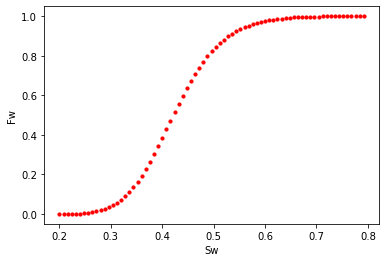

In [2]:
#case 1
Soi=0.80
Swi=0.20
Sor=0.20
meu_O=[2]
meu_W=0.4

rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)

    df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
   # plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='b')
    plt.scatter('Sw' ,'fw', data=df1 , s=10 ,c='r')
    #plt.legend([ "Sw"], loc ="lower right")
    plt.xlabel('Sw')
    plt.ylabel('Fw')
df1

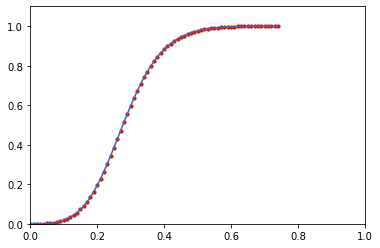

poly1d([-1.23650678e+05,  6.83084028e+05, -1.62568136e+06,  2.18952568e+06,
       -1.83812221e+06,  9.96152162e+05, -3.48471538e+05,  7.65910160e+04,
       -1.01282908e+04,  7.85173469e+02, -2.97386539e+01,  4.40229786e-01,
       -8.68365259e-04])

In [8]:
X=df1['Recovery']
Y=df1['fw']

XC=np.linspace(0,0.75)
f=np.poly1d(np.polyfit(X,Y,12))
plt.scatter(X,Y,c='r',s=10)
plt.plot(X,f(X))
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.show()
f
#np.poly1d([2,3,4],2)
#2*x**2+3*x

In [10]:
#viscosity of oil is low(2cp) (means mobility is high) because of high transmiscibilty we can use the large spacing
spc=600 #(mtr)
field_area=20 #(km2)
wells_req=(field_area*0.90)/(spc/1000)**2
wells_req

50.0

In [13]:
well_per_month=2
j=0
well_per_month_arr=[]
months_arr=[]
eff_well_arr=[]
cum_wells_drilled_arr=[]
time=2 #(months)
Eff_wells_on_prod_for_1year_arr=[]
for l in range(0,time):
    Eff_wells_on_prod_for_1year_arr.append(0)
    eff_well_arr.append(0)
g=0
for i in range(1,13):
    months=i
    cum_wells_drilled=2*i
    cum_wells_drilled_arr.append(cum_wells_drilled)
    months_arr.append(months)
    well_per_month_arr.append(well_per_month)
for i in range(1,(13-time)):
    eff_well=2*i
    Eff_wells_on_prod_for_1year=well_per_month*(len(months_arr)-time-g)/12
    g+=1
    Eff_wells_on_prod_for_1year_arr.append(Eff_wells_on_prod_for_1year)
    eff_well_arr.append(eff_well)
    
df1=DataFrame([months_arr,well_per_month_arr,cum_wells_drilled_arr,eff_well_arr,Eff_wells_on_prod_for_1year_arr],index=['Month','Wells Per Month','Cum Wells Drilled','Eff. Wells on Prod','Eff wells on prod for 1year']).T
df1.index.name='Sr. No.'
df1


,Month,Wells Per Month,Cum Wells Drilled,Eff. Wells on Prod,Eff wells on prod for 1year
Sr. No.,,,,,
0,1.0,2.0,2.0,0.0,0.000000
1,2.0,2.0,4.0,0.0,0.000000
2,3.0,2.0,6.0,2.0,1.666667
3,4.0,2.0,8.0,4.0,1.500000
4,5.0,2.0,10.0,6.0,1.333333
5,6.0,2.0,12.0,8.0,1.166667
6,7.0,2.0,14.0,10.0,1.000000
7,8.0,2.0,16.0,12.0,0.833333
8,9.0,2.0,18.0,14.0,0.666667


In [14]:
total_Eff_wells_on_prod_for_1year=int(sum(Eff_wells_on_prod_for_1year_arr))
total_Eff_wells_on_prod_for_1year

9

In [16]:
#f=[5.57192728e+02, -1.07109542e+03,  6.52355706e+02, -1.05683181e+02,-1.76405959e+01,  6.57840409e+00, -4.74725617e-01,  5.86987341e-03]

In [15]:
#given_data
test_rate_of_ver_well=150 #(m3/d)

OIIP=25 #(MMm3)


#+====================================
year_arr=[]
max_well_in_year_arr=[]
total_wells_drilled_arr=[]
wells_on_prod_arr=[]
wells_on_prod=total_Eff_wells_on_prod_for_1year
wells_on_prod_arr.append(wells_on_prod)
j=0
max_well_in_year=24
max_well_in_year_arr.append(24)
for i in range(0,20):
    if max_well_in_year<50:
        max_well_in_year+=max_well_in_year
        max_well_in_year_arr.append(24)
    else:
        max_well_in_year_arr.append(0)
total_wells_drilled=24
for i in range(0,24):
    if total_wells_drilled<=48:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(24)
    elif total_wells_drilled>48 and total_wells_drilled==72:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(2)

    else:
        total_wells_drilled_arr.append(0)
#==========wells_on_prod====================
for i in range(0,20):
    year_arr.append(j+1)
    if wells_on_prod<33:
        wells_on_prod=wells_on_prod_arr[j]+(24-9)+9
        wells_on_prod_arr.append(wells_on_prod)
    elif wells_on_prod>=33:
        wells_on_prod_arr.append(50)
    j+=1
print(wells_on_prod_arr)
#==================================
total_wells_drilled_arr,max_well_in_year_arr

[9, 33, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


([24, 24, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [24, 24, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
wc_app_arr=[]
liq_rate_arr=[]
oil_rate_arr=[]
approx_cum_oil_arr=[]
Np_by_N_arr=[]
end_of_year_wcut_arr=[]
avg_water_arr=[]
avg_oil_rate_arr=[]
cum_oil_arr=[]
oil_rec_arr=[]
approx_cum_oil=0
wc_app=0
wc_app_arr.append(0)
cum_oil=0
for i in range(0,20):
    liq_rate=wells_on_prod_arr[i]*test_rate_of_ver_well
    oil_rate=liq_rate*(1-wc_app_arr[i])
    approx_cum_oil=approx_cum_oil+(oil_rate*365/1000000)  #+approx_cum_oil_arr[i-1]
    k=approx_cum_oil/OIIP
    y=f(k)
    end_of_year_wcut_arr.append(y)
    wc_app_arr.append(y)
    avg_water=(wc_app_arr[i]+end_of_year_wcut_arr[i])/2
    avg_oil_rate=liq_rate*(1-avg_water)
    cum_oil+=(avg_oil_rate*365/1000000)
    oil_rec=(cum_oil*100*0.95/OIIP)
    oil_rec_arr.append(oil_rec)
    cum_oil_arr.append(cum_oil)
    avg_oil_rate_arr.append(avg_oil_rate)
    avg_water_arr.append(avg_water)
    Np_by_N_arr.append(k)
    liq_rate_arr.append(liq_rate)
    oil_rate_arr.append(oil_rate)
    approx_cum_oil_arr.append(approx_cum_oil)

In [19]:
df3=DataFrame([year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr],index=[['year_arr','max_well_in_year_arr','total_wells_drilled_arr','wells_on_prod_arr','liq_rate_arr','wc_app_arr','oil_rate_arr','approx_cum_oil_arr','Np_by_N_arr','end_of_year_wcut_arr','avg_water_arr','avg_oil_rate_arr','cum_oil_arr','oil_rec_arr']]).T.head(19)
df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr
0,1.0,24.0,24.0,9.0,1350.0,0.000000,1350.000000,0.492750,0.019710,0.000948,0.000474,1349.360364,0.492517,1.871563
1,2.0,24.0,24.0,33.0,4950.0,0.000948,4945.309337,2.297788,0.091912,0.014303,0.007625,4912.254866,2.285490,8.684860
2,3.0,24.0,2.0,50.0,7500.0,0.014303,7392.727872,4.996134,0.199845,0.193406,0.103854,6721.093185,4.738689,18.007017
3,4.0,0.0,0.0,50.0,7500.0,0.193406,6049.458498,7.204186,0.288167,0.547940,0.370673,4719.955528,6.461472,24.553595
4,5.0,0.0,0.0,50.0,7500.0,0.547940,3390.452558,8.441701,0.337668,0.732632,0.640286,2697.858034,7.446191,28.295524
5,6.0,0.0,0.0,50.0,7500.0,0.732632,2005.263510,9.173622,0.366945,0.815045,0.773838,1696.213047,8.065308,30.648171
6,7.0,0.0,0.0,50.0,7500.0,0.815045,1387.162585,9.679937,0.387197,0.859385,0.837215,1220.888022,8.510932,32.341543
7,8.0,0.0,0.0,50.0,7500.0,0.859385,1054.613460,10.064871,0.402595,0.886745,0.873065,952.014109,8.858418,33.661987
8,9.0,0.0,0.0,50.0,7500.0,0.886745,849.414758,10.374907,0.414996,0.905246,0.895996,780.033188,9.143130,34.743893
9,10.0,0.0,0.0,50.0,7500.0,0.905246,710.651618,10.634295,0.425372,0.918587,0.911917,660.625091,9.384258,35.660180


In [20]:
#[year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr]
oil_rec_perc_arr=[]
for i in range(0,20):
    oil_rec_perc=round(oil_rec_arr[i]/100,4)
    oil_rec_perc_arr.append(oil_rec_perc)
df3['oil_rec_perc_arr']=oil_rec_perc_arr[0:19]

In [21]:
df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr,oil_rec_perc_arr
0,1.0,24.0,24.0,9.0,1350.0,0.000000,1350.000000,0.492750,0.019710,0.000948,0.000474,1349.360364,0.492517,1.871563,0.0187
1,2.0,24.0,24.0,33.0,4950.0,0.000948,4945.309337,2.297788,0.091912,0.014303,0.007625,4912.254866,2.285490,8.684860,0.0868
2,3.0,24.0,2.0,50.0,7500.0,0.014303,7392.727872,4.996134,0.199845,0.193406,0.103854,6721.093185,4.738689,18.007017,0.1801
3,4.0,0.0,0.0,50.0,7500.0,0.193406,6049.458498,7.204186,0.288167,0.547940,0.370673,4719.955528,6.461472,24.553595,0.2455
4,5.0,0.0,0.0,50.0,7500.0,0.547940,3390.452558,8.441701,0.337668,0.732632,0.640286,2697.858034,7.446191,28.295524,0.2830
5,6.0,0.0,0.0,50.0,7500.0,0.732632,2005.263510,9.173622,0.366945,0.815045,0.773838,1696.213047,8.065308,30.648171,0.3065
6,7.0,0.0,0.0,50.0,7500.0,0.815045,1387.162585,9.679937,0.387197,0.859385,0.837215,1220.888022,8.510932,32.341543,0.3234
7,8.0,0.0,0.0,50.0,7500.0,0.859385,1054.613460,10.064871,0.402595,0.886745,0.873065,952.014109,8.858418,33.661987,0.3366
8,9.0,0.0,0.0,50.0,7500.0,0.886745,849.414758,10.374907,0.414996,0.905246,0.895996,780.033188,9.143130,34.743893,0.3474
9,10.0,0.0,0.0,50.0,7500.0,0.905246,710.651618,10.634295,0.425372,0.918587,0.911917,660.625091,9.384258,35.660180,0.3566


In [22]:
new_oil_prod_in_year_arr=[]
new_oil_prod_in_year_arr=[9,24,17]
for i in range(0,17):
    new_oil_prod_in_year_arr.append(0)
        


In [23]:

total_oil_producers_arr=wells_on_prod_arr
r_by_p_arr=[]
for i in range(0,20):
    d=(OIIP-cum_oil_arr[i])/(avg_oil_rate_arr[i]*365/1000000)
    r_by_p_arr.append(d)
#len(cum_oil_arr),avg_oil_rate_arr


In [24]:
net_rec_arr=[]
net_rec_arr.append(oil_rec_perc_arr[0])
for i in range(1,20):
    c=oil_rec_perc_arr[i]-oil_rec_perc_arr[i-1]
    net_rec_arr.append(c)


In [25]:
df4=DataFrame([year_arr,new_oil_prod_in_year_arr,total_oil_producers_arr,avg_oil_rate_arr,avg_water_arr,cum_oil_arr,oil_rec_arr,r_by_p_arr],index=['Year','new_oil_prod_in_year','total_oil_producers','avg_oil_rate','avg_water','cum_oil','oil_rec','R/P']).T.head(19)

## Production Profile

In [26]:
df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr,oil_rec_perc_arr
0,1.0,24.0,24.0,9.0,1350.0,0.000000,1350.000000,0.492750,0.019710,0.000948,0.000474,1349.360364,0.492517,1.871563,0.0187
1,2.0,24.0,24.0,33.0,4950.0,0.000948,4945.309337,2.297788,0.091912,0.014303,0.007625,4912.254866,2.285490,8.684860,0.0868
2,3.0,24.0,2.0,50.0,7500.0,0.014303,7392.727872,4.996134,0.199845,0.193406,0.103854,6721.093185,4.738689,18.007017,0.1801
3,4.0,0.0,0.0,50.0,7500.0,0.193406,6049.458498,7.204186,0.288167,0.547940,0.370673,4719.955528,6.461472,24.553595,0.2455
4,5.0,0.0,0.0,50.0,7500.0,0.547940,3390.452558,8.441701,0.337668,0.732632,0.640286,2697.858034,7.446191,28.295524,0.2830
5,6.0,0.0,0.0,50.0,7500.0,0.732632,2005.263510,9.173622,0.366945,0.815045,0.773838,1696.213047,8.065308,30.648171,0.3065
6,7.0,0.0,0.0,50.0,7500.0,0.815045,1387.162585,9.679937,0.387197,0.859385,0.837215,1220.888022,8.510932,32.341543,0.3234
7,8.0,0.0,0.0,50.0,7500.0,0.859385,1054.613460,10.064871,0.402595,0.886745,0.873065,952.014109,8.858418,33.661987,0.3366
8,9.0,0.0,0.0,50.0,7500.0,0.886745,849.414758,10.374907,0.414996,0.905246,0.895996,780.033188,9.143130,34.743893,0.3474
9,10.0,0.0,0.0,50.0,7500.0,0.905246,710.651618,10.634295,0.425372,0.918587,0.911917,660.625091,9.384258,35.660180,0.3566


## Master Table

In [27]:
df4

,Year,new_oil_prod_in_year,total_oil_producers,avg_oil_rate,avg_water,cum_oil,oil_rec,R/P
0,1.0,9.0,9.0,1349.360364,0.000474,0.492517,1.871563,49.759717
1,2.0,24.0,33.0,4912.254866,0.007625,2.285490,8.684860,12.668629
2,3.0,17.0,50.0,6721.093185,0.103854,4.738689,18.007017,8.259139
3,4.0,0.0,50.0,4719.955528,0.370673,6.461472,24.553595,10.760798
4,5.0,0.0,50.0,2697.858034,0.640286,7.446191,28.295524,17.826227
5,6.0,0.0,50.0,1696.213047,0.773838,8.065308,30.648171,27.352941
6,7.0,0.0,50.0,1220.888022,0.837215,8.510932,32.341543,37.002188
7,8.0,0.0,50.0,952.014109,0.873065,8.858418,33.661987,46.452582
8,9.0,0.0,50.0,780.033188,0.895996,9.143130,34.743893,55.694400
9,10.0,0.0,50.0,660.625091,0.911917,9.384258,35.660180,64.761172


Text(0,0.5,'Oil Recovery')

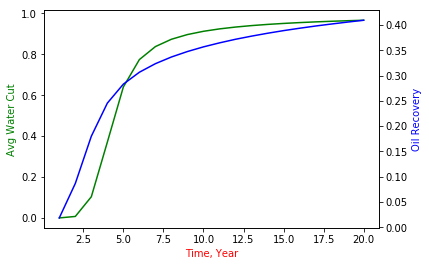

In [28]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(year_arr,avg_water_arr, 'g-')
ax2.plot(year_arr,oil_rec_perc_arr, 'b-')

ax1.set_xlabel('Time, Year',color='r')
ax1.set_ylabel('Avg Water Cut', color='g')
ax2.set_ylabel('Oil Recovery', color='b')

Text(0,0.5,'Net Recovery per Year')

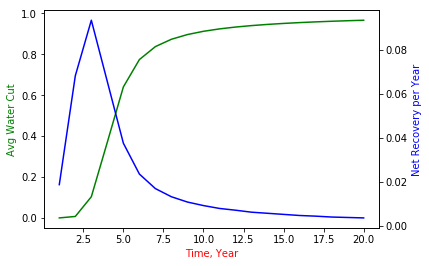

In [29]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(year_arr,avg_water_arr, 'g-')
ax2.plot(year_arr,net_rec_arr, 'b-')

ax1.set_xlabel('Time, Year',color='r')
ax1.set_ylabel('Avg Water Cut', color='g')
ax2.set_ylabel('Net Recovery per Year', color='b')

# EOR

Case 1

soi=0.80

swi=0.20

sor=0.20

meu_O=[2]

Meu_W=0.4

Here mobility ratio is 5 (close to 1) that is favorable

so now go for Sor (IFT reduction) by either Miscleble or ASP Process

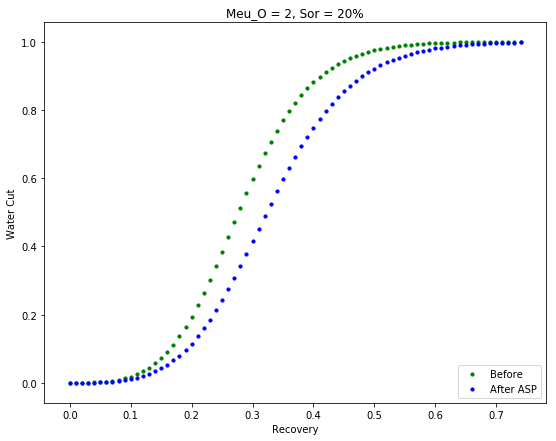

In [30]:
Soi=0.80
Swi=0.20
Sor=0.20
meu_O=[2]
meu_W=0.4
rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)

    df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
#===========================================================================================================
#Assume we do one of above mentioned processes to reduce IFT and Sor reduces to 0.10
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
def case_fir(Soi,Swi,Sor,meu_W):
    for i in meu_O:
        for r in rec:
            So=Soi-r*Soi
            Sw=1-So
            s_norm=((Sw-Swi)/(1-Swi-Sor))
            Krw=(s_norm)**3
            Kro=(1-s_norm)**3
            fw=1/(1+((Kro*meu_W)/(Krw*i)))
            fw_arr.append(fw)
            So_arr.append(So)
            Sw_arr.append(Sw)
            s_norm_arr.append(s_norm)
            Krw_arr.append(Krw)
            Kro_arr.append(Kro)
case_fir(0.80,0.20,0.10,0.4)
df2=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='g')
plt.scatter('Recovery' ,'fw', data=df2 , s=10 ,c='b')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9, 7)
plt.xlabel('Recovery')
plt.ylabel('Water Cut')
plt.title('Meu_O = 2, Sor = 20%')
plt.legend(["Before", "After ASP"], loc ="lower right")
# Customize the major grid
#plt.grid(which='major', linestyle='-', linewidth='0.3', color='red')
# Customize the minor grid
#plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')

# Economics

In [31]:
OPEX = 20 #(US$/bbl)
oil_price = 60 #(US$/bbl)
royalty = 6 #(US$/bbl)  #6% of oil price
income_tax = 5 #(%)
disc_rate = 14 #(%)
CAPEX = 30 #(Million US$)
year_arr=[]
disc_factor_arr=[]
opex_arr=[]
opex_arr.append(0)
capex_arr=[]
capex_arr.append(CAPEX*1000000)
for i in range(0,19):
    capex_arr.append(0)
disc_outflow_arr=[]
oil_rate_perday_arr=[]
oil_rate_perday_arr.append(0)
oil_rate_peryear_arr=[]
oil_rate_peryear_arr.append(0)
revenue_by_pv_arr=[]
disc_revenue_arr=[]
npv_before_tax_arr=[]
npv_after_tax_arr=[]
cons_arr=[]
#cons_arr.append(-30000000)
#year_arr.append(0)
for i in range(0,16):
    oil_rate_perday_arr.append(round(avg_oil_rate_arr[i],2)*6.28981)
    oil_rate_peryear_arr.append(round(avg_oil_rate_arr[i],2)*6.28981*365)
    revenue_by_pv_arr.append(oil_rate_peryear_arr[i]*oil_price)
    year_arr.append(i)
    d=round((1+(disc_rate/100))**year_arr[i],2)
    disc_factor_arr.append(d)
    disc_revenue_arr.append(revenue_by_pv_arr[i]/disc_factor_arr[i])
    o=round(avg_oil_rate_arr[i]*365*6.28981*OPEX,2)
    #print(o)
    #print(d)

    disc_out=round((opex_arr[i]+capex_arr[i])/disc_factor_arr[i],2)
    disc_outflow_arr.append(disc_out)
    npv_before_tax_arr.append(disc_revenue_arr[i]-disc_outflow_arr[i])
    npv_after_tax_arr.append((disc_revenue_arr[i]-disc_outflow_arr[i])*(1-(income_tax/100)))
    opex_arr.append(o)
#sum(revenue_by_pv_arr),sum(npv_before_tax_arr),sum(npv_after_tax_arr),opex_arr
#for i in range(1,20):
#    cons_arr.append(revenue_by_pv_arr[i])
#revenue_by_pv_arr,cons_arr
irr_before_tax=npf.irr(npv_before_tax_arr)
irr_after_tax=npf.irr(npv_after_tax_arr)
irr_before_tax,irr_after_tax
df3=DataFrame([year_arr,disc_factor_arr,opex_arr,capex_arr,disc_outflow_arr,oil_rate_peryear_arr,revenue_by_pv_arr,disc_revenue_arr,npv_before_tax_arr,npv_after_tax_arr],index=['Year','Discounted Factor','OPEX, $','CAPEX, $','Discounted Outflow, $','Oil Rate Per Year, bbl','Revenue/PV, $','Discounted Revenue, $','NPV Before Tax, $','NPV After Tax, $']).T.head(15)
df3['Royality']=df3['Oil Rate Per Year, bbl']*royalty
df3['NPV After Royality']=(df3['NPV After Tax, $']-df3['Royality'])
sum_after_royality=sum(df3['NPV After Royality'])
npv_after_royality=list(df3['NPV After Royality'])
irr_after_royality=npf.irr(df3['NPV After Royality'])
pay_out_time=round(abs(df3['NPV Before Tax, $'][0]/df3['NPV Before Tax, $'][1]*12),2)
df4=DataFrame([[("%.2f" % (sum(revenue_by_pv_arr))),("%.2f" % (sum(npv_before_tax_arr))),("%.2f" % (sum(npv_after_tax_arr))),irr_before_tax*100,irr_after_tax*100,("%.2f" % sum_after_royality),irr_after_royality*100,pay_out_time]],columns=['Present Revenue, $','NPV Before Tax, $','NPV After Tax, $','IRR Before Tax, %', 'IRR After Tax, %','NPV after Tax and Royality, $','IRR after Royality, %','Pay Out Time, Months'])
df3
#  ("%.2f" % (round(avg_oil_rate_arr[i]*365*6.28981*OPEX,2)))

,Year,Discounted Factor,"OPEX, $","CAPEX, $","Discounted Outflow, $","Oil Rate Per Year, bbl","Revenue/PV, $","Discounted Revenue, $","NPV Before Tax, $","NPV After Tax, $",Royality,NPV After Royality
0,0.0,1.00,0.000000e+00,30000000.0,3.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+07,-2.850000e+07,0.000000e+00,-2.850000e+07
1,1.0,1.14,6.195671e+07,0.0,5.434799e+07,3.097835e+06,1.858701e+08,1.630439e+08,1.086959e+08,1.032611e+08,1.858701e+07,8.467413e+07
2,2.0,1.30,2.255492e+08,0.0,1.734994e+08,1.127745e+07,6.766469e+08,5.204976e+08,3.469982e+08,3.296483e+08,6.766469e+07,2.619836e+08
3,3.0,1.48,3.086031e+08,0.0,2.085156e+08,1.543015e+07,9.258089e+08,6.255466e+08,4.170309e+08,3.961794e+08,9.258089e+07,3.035985e+08
4,4.0,1.69,2.167197e+08,0.0,1.282365e+08,1.083599e+07,6.501596e+08,3.847098e+08,2.564733e+08,2.436497e+08,6.501596e+07,1.786337e+08
5,5.0,1.93,1.238738e+08,0.0,6.418332e+07,6.193695e+06,3.716217e+08,1.925501e+08,1.283668e+08,1.219484e+08,3.716217e+07,8.478627e+07
6,6.0,2.19,7.788266e+07,0.0,3.556286e+07,3.894126e+06,2.336476e+08,1.066884e+08,7.112553e+07,6.756925e+07,2.336476e+07,4.420449e+07
7,7.0,2.50,5.605782e+07,0.0,2.242313e+07,2.802896e+06,1.681737e+08,6.726950e+07,4.484637e+07,4.260405e+07,1.681737e+07,2.578667e+07
8,8.0,2.85,4.371231e+07,0.0,1.533765e+07,2.185606e+06,1.311364e+08,4.601276e+07,3.067511e+07,2.914135e+07,1.311364e+07,1.602772e+07
9,9.0,3.25,3.581570e+07,0.0,1.102022e+07,1.790778e+06,1.074467e+08,3.306051e+07,2.204030e+07,2.093828e+07,1.074467e+07,1.019362e+07


In [32]:
df4

,"Present Revenue, $","NPV Before Tax, $","NPV After Tax, $","IRR Before Tax, %","IRR After Tax, %","NPV after Tax and Royality, $","IRR after Royality, %","Pay Out Time, Months"
0,3859808308.02,1453006073.71,1380355770.03,498.664952,498.664952,994954291.05,418.807982,3.31


In [33]:
#directly calculated from excel
PERCENT=[10,20,30,-10,-20,-30]
OIL_PRICE=[2295818951,2599186641,2902554330,1689083573,1385715883,1082348194]
OPEX=[1891328699,1790206136,1689083573,2093573825,2194696388,2295818951]
CAPEX=[1989451262,1986451262,1983451262,1995451262,1998451262,2001451262]
df=DataFrame([PERCENT,OIL_PRICE,OPEX,CAPEX],index=['PERCENT','OIL_PRICE','OPEX','CAPEX']).T
df

,PERCENT,OIL_PRICE,OPEX,CAPEX
0,10,2295818951,1891328699,1989451262
1,20,2599186641,1790206136,1986451262
2,30,2902554330,1689083573,1983451262
3,-10,1689083573,2093573825,1995451262
4,-20,1385715883,2194696388,1998451262
5,-30,1082348194,2295818951,2001451262


Text(-30,0,'NPV, Billion ---->')

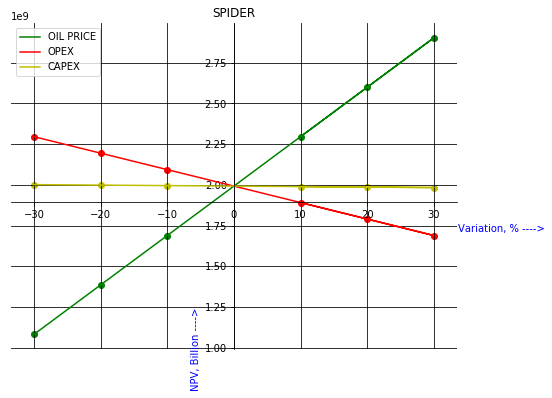

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('SPIDER')

# move axes
ax.spines['left'].set_position(('axes', 0.50))
# ax.spines['left'].set_smart_bounds(True)
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('axes', 0.450))
# ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(True,c='black')

ax.scatter(df.PERCENT,df.OIL_PRICE,c='g')
ax.plot(df.PERCENT,df.OIL_PRICE,c='g')
ax.scatter(df.PERCENT,df.OPEX,c='r')
ax.plot(df.PERCENT,df.OPEX,c='r')
ax.scatter(df.PERCENT,df.CAPEX,c='y')
ax.plot(df.PERCENT,df.CAPEX,c='y')
ax.legend(['OIL PRICE','OPEX','CAPEX'])
ax.set_xlabel('Variation, % ---->',color='blue',position=(1.1,30))
ax.set_ylabel('NPV, Billion ---->',color='blue',position=(-30,0))